In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [3]:
address= 'C:/Users/Admin/Desktop/DFKI/out.csv'
dataset= pd.read_csv(address)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,output
0,2,106,64,35,119,30.5,1.400,34,0
1,2,95,54,14,88,26.1,0.748,22,0
2,1,100,66,29,196,32.0,0.444,42,0
3,0,126,86,27,120,27.4,0.515,21,0
4,6,103,66,0,0,24.3,0.249,29,0


In [10]:
X =dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.25, shuffle=True)

In [14]:
outcome=dataset['output']
data=dataset[dataset.columns[:8]]
train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['output'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['output']
test_Y=test['output']

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       1.00      0.64      0.78        14

    accuracy                           0.90        48
   macro avg       0.94      0.82      0.86        48
weighted avg       0.91      0.90      0.89        48



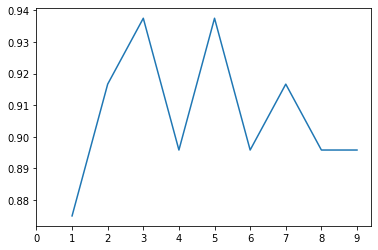

In [16]:
a_index=list(range(1,10))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9]
for i in list(range(1,10)):
    modelk=KNeighborsClassifier(n_neighbors=i) 
    modelk.fit(train_X,train_Y)
    predictionk=modelk.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(predictionk,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
#plt.show()
#print('Accuracies for different values of n are:',a.values)
print(metrics.classification_report(test_Y,predictionk))
KNNscore = modelk.score(test_X,test_Y)

In [17]:
def plot_feat1_feat2(feat1, feat2) :  
    D = dataset[(dataset['output'] != 0)]
    H = dataset[(dataset['output'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)


In [21]:
def plot_pie(var_select, sub) :
    D = dataset[(dataset['output'] != 0)]
    H = dataset[(dataset['output'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name+value",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name+value",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

    print(trace1.values) 
    print(trace2.values)

In [22]:
dataset.loc[:,'N1']=0
dataset.loc[(dataset['Age']<=30) & (dataset['Glucose']<=120),'N1']=1

In [23]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

(54, 1)
(71, 66)


In [25]:
TP =54                          #confusion_matrix[1, 1]
TN = 71                         #confusion_matrix[0, 0]
FP = 66                           #confusion_matrix[0, 1]
FN = 1                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))
print("F1 Score: %.4f" %(2*(((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN))))))

Sensitivity: 0.9818
Specificity  : 0.5182
Accuracy  : 0.6510
Precision: 0.4500
Recall: 0.9818
F1 Score: 0.6171
F1 Score: 0.6171


In [26]:
dataset.loc[:,'N3']=0
dataset.loc[(dataset['Age']<=30) & (dataset['Pregnancies']<=6),'N3']=1

In [27]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

(36, 19)
(96, 41)


In [28]:
TP =36                          #confusion_matrix[1, 1]
TN = 96                         #confusion_matrix[0, 0]
FP = 41                           #confusion_matrix[0, 1]
FN = 19                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))
print("F1 Score: %.4f" %(2*(((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN))))))

Sensitivity: 0.6545
Specificity  : 0.7007
Accuracy  : 0.6875
Precision: 0.4675
Recall: 0.6545
F1 Score: 0.5455
F1 Score: 0.5455


In [29]:
dataset.loc[:,'N7']=0
dataset.loc[(dataset['Glucose']<=105) & (dataset['BMI']<=30),'N7']=1



In [30]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

(55,)
(104, 33)


In [31]:
TP =55                          #confusion_matrix[1, 1]
TN = 104                         #confusion_matrix[0, 0]
FP = 33                           #confusion_matrix[0, 1]
FN = 0                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))
#print("F1 Score: %.4f" %(2*(((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN))))))

Sensitivity: 1.0000
Specificity  : 0.7591
Accuracy  : 0.8281
Precision: 0.6250
Recall: 1.0000
F1 Score: 0.7692


In [32]:
dataset.loc[:,'N2']=0
dataset.loc[(dataset['BMI']<=30),'N2']=1

In [33]:
plot_pie('N2', 'BMI <= 30')

(53, 2)
(70, 67)


In [34]:
TP =53                          #confusion_matrix[1, 1]
TN = 70                         #confusion_matrix[0, 0]
FP = 67                           #confusion_matrix[0, 1]
FN = 2                           #confusion_matrix[1, 0]
# DT
print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))
print("Accuracy  : %.4f" % ((TN+TP) / float(TN + FP+TP+FN)))
pre= (TP / float(TP + FP))
print("Precision: %.4f" %(TP / float(TP + FP)))
print("Recall: %.4f" % (TP / float(TP + FN)))
rec=(TP / float(TP + FN))
print("F1 Score: %.4f" % (2*(pre*rec) / float(pre+rec)))
print("F1 Score: %.4f" %(2*(((TP/(TP+FP))*(TP/(TP+FN)))/((TP/(TP+FP))+(TP/(TP+FN))))))

Sensitivity: 0.9636
Specificity  : 0.5109
Accuracy  : 0.6406
Precision: 0.4417
Recall: 0.9636
F1 Score: 0.6057
F1 Score: 0.6057
